In [4]:
# Cargar el archivo
from google.colab import files
uploaded = files.upload()

Saving DMC Análisis de datos_ENAHO 2020_Mod400_VF.xlsx to DMC Análisis de datos_ENAHO 2020_Mod400_VF.xlsx


In [5]:
#####################################################################
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Cargar los datos desde el archivo Excel en Google Colab
file_path = next(iter(uploaded))
df = pd.read_excel(file_path, sheet_name='ENAHO MOD 400 SALUD LIMA')

In [6]:
# Definir las variables independientes (X) y la variable dependiente (y)
X = df[['P208A', 'P301A', 'P207', 'P401']]
y = df['GASTO TOTAL']

In [7]:
#### Importamos las librerías a usar
import numpy as np
import pandas as pd
import glob
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [8]:
# Paso 1: Revisar las primeras filas del DataFrame
print(df.head())

      AÑO  P400N P400I  P400A3 P401C P401H1 P401H2 P401H3 P401H4 P401H5  \
0  2020.0    1.0     2  1969.0    Si     No     No     No     No     No   
1  2020.0    2.0     2  1975.0    Si     No     No     No     No     No   
2  2020.0    3.0     2  1995.0    Si     No     No     No     No     No   
3  2020.0    4.0     2  1998.0    Si     No     No     No     No     No   
4  2020.0    1.0     1  1975.0    Si     No     No     No     No     No   

  P401H6 P401                                              P4021  \
0     No   Si  Síntoma o malestar (tos, dolor de cabeza, fieb...   
1     No   No  Síntoma o malestar (tos, dolor de cabeza, fieb...   
2     No   Si  Síntoma o malestar (tos, dolor de cabeza, fieb...   
3     No   Si                                               Pase   
4     No   No                                               Pase   

                              P4022 P4023 P4024  \
0  Enfermedad (gripe, colitis, etc)  Pase  Pase   
1                              Pase  P

In [9]:
# Paso 1: Revisar las primeras filas del DataFrame
print(df[['P208A', 'P301A', 'P207', 'P401', 'GASTO TOTAL']].head())

   P208A                              P301A    P207 P401  GASTO TOTAL
0   50.0  Superior Universitaria Incompleta  Hombre   Si         10.0
1   44.0  Superior Universitaria Incompleta   Mujer   No        204.0
2   24.0  Superior Universitaria Incompleta   Mujer   Si        140.0
3   21.0  Superior Universitaria Incompleta   Mujer   Si         75.0
4   44.0                Secundaria Completa  Hombre   No         42.0


In [10]:
# Seleccionar las columnas de interés
df_subset = df[['P208A', 'P301A', 'P207', 'P401', 'GASTO TOTAL']]

In [11]:
# Mostrar estadísticas descriptivas básicas
print("Estadísticas descriptivas básicas:")
print(df_subset.describe())

# Mostrar tipo de datos de cada columna
print("\nTipo de datos de cada columna:")
print(df_subset.dtypes)

Estadísticas descriptivas básicas:
              P208A    GASTO TOTAL
count  15543.000000   15543.000000
mean      36.026893     309.001107
std       22.436511    6107.629995
min        0.000000       0.000000
25%       17.000000       0.000000
50%       34.000000       0.000000
75%       53.000000      15.000000
max       98.000000  199999.800000

Tipo de datos de cada columna:
P208A          float64
P301A           object
P207            object
P401            object
GASTO TOTAL    float64
dtype: object


In [13]:
# Filtrar filas donde 'GASTO TOTAL' no sea nulo
df_clean = df_subset[df_subset['GASTO TOTAL'].notnull()]

# Mostrar las primeras filas del DataFrame limpio
print(df_clean.head())

   P208A                              P301A    P207 P401  GASTO TOTAL
0   50.0  Superior Universitaria Incompleta  Hombre   Si         10.0
1   44.0  Superior Universitaria Incompleta   Mujer   No        204.0
2   24.0  Superior Universitaria Incompleta   Mujer   Si        140.0
3   21.0  Superior Universitaria Incompleta   Mujer   Si         75.0
4   44.0                Secundaria Completa  Hombre   No         42.0


In [14]:
# Mostrar estadísticas descriptivas básicas del DataFrame limpio
print("Estadísticas descriptivas básicas del DataFrame limpio:")
print(df_clean.describe())


Estadísticas descriptivas básicas del DataFrame limpio:
              P208A    GASTO TOTAL
count  15543.000000   15543.000000
mean      36.026893     309.001107
std       22.436511    6107.629995
min        0.000000       0.000000
25%       17.000000       0.000000
50%       34.000000       0.000000
75%       53.000000      15.000000
max       98.000000  199999.800000


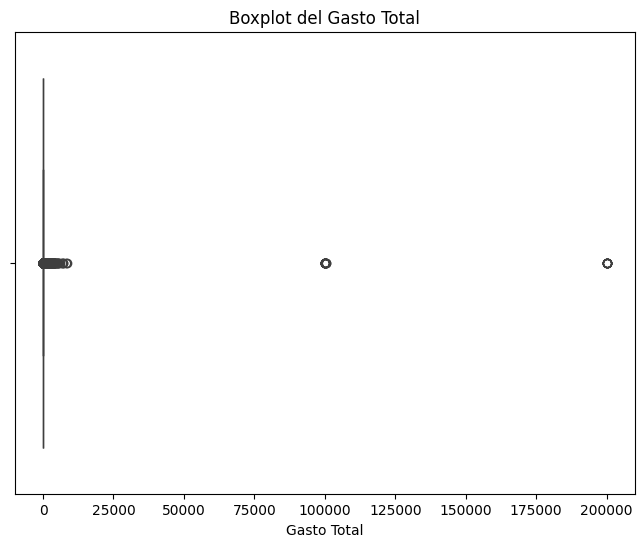

In [17]:
# Crear boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_clean['GASTO TOTAL'])
plt.title('Boxplot del Gasto Total')
plt.xlabel('Gasto Total')
plt.show()


In [18]:
# Estadísticas adicionales
print("\nEstadísticas adicionales de GASTO TOTAL:")
print("Media:", df_clean['GASTO TOTAL'].mean())
print("Mediana:", df_clean['GASTO TOTAL'].median())
print("Mínimo:", df_clean['GASTO TOTAL'].min())
print("Máximo:", df_clean['GASTO TOTAL'].max())
print("Cuartiles:")
print(df_clean['GASTO TOTAL'].quantile([0.25, 0.5, 0.75]))


Estadísticas adicionales de GASTO TOTAL:
Media: 309.001106607737
Mediana: 0.0
Mínimo: 0.0
Máximo: 199999.8
Cuartiles:
0.25     0.0
0.50     0.0
0.75    15.0
Name: GASTO TOTAL, dtype: float64


In [19]:
# Contar valores cero en 'GASTO TOTAL'
num_zeros = (df_clean['GASTO TOTAL'] == 0).sum()
print("Número de valores cero en 'GASTO TOTAL':", num_zeros)

Número de valores cero en 'GASTO TOTAL': 10490


In [20]:
# Eliminar filas con valores cero en 'GASTO TOTAL'
df_filtered = df_clean[df_clean['GASTO TOTAL'] != 0]

# Mostrar las primeras filas del DataFrame filtrado
print(df_filtered.head())


   P208A                              P301A    P207 P401  GASTO TOTAL
0   50.0  Superior Universitaria Incompleta  Hombre   Si         10.0
1   44.0  Superior Universitaria Incompleta   Mujer   No        204.0
2   24.0  Superior Universitaria Incompleta   Mujer   Si        140.0
3   21.0  Superior Universitaria Incompleta   Mujer   Si         75.0
4   44.0                Secundaria Completa  Hombre   No         42.0


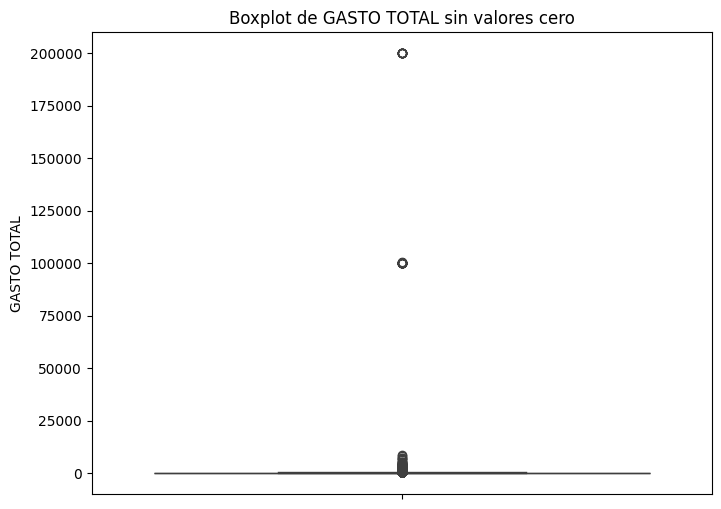


Estadísticas adicionales de GASTO TOTAL sin valores cero:
Media: 950.4856916691185
Mediana: 50.0
Mínimo: 0.20000000298023224
Máximo: 199999.8
Cuartiles:
0.25     16.6
0.50     50.0
0.75    150.0
Name: GASTO TOTAL, dtype: float64


In [21]:
# Boxplot de la columna 'GASTO TOTAL' sin valores cero
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered, y='GASTO TOTAL')
plt.title('Boxplot de GASTO TOTAL sin valores cero')
plt.ylabel('GASTO TOTAL')
plt.show()

# Estadísticas adicionales del DataFrame filtrado
print("\nEstadísticas adicionales de GASTO TOTAL sin valores cero:")
print("Media:", df_filtered['GASTO TOTAL'].mean())
print("Mediana:", df_filtered['GASTO TOTAL'].median())
print("Mínimo:", df_filtered['GASTO TOTAL'].min())
print("Máximo:", df_filtered['GASTO TOTAL'].max())
print("Cuartiles:")
print(df_filtered['GASTO TOTAL'].quantile([0.25, 0.5, 0.75]))


In [22]:
# Calcular el rango intercuartílico (IQR)
Q1 = df_filtered['GASTO TOTAL'].quantile(0.25)
Q3 = df_filtered['GASTO TOTAL'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores dentro del rango intercuartílico
df_filtered_within_iqr = df_filtered[(df_filtered['GASTO TOTAL'] >= lower_bound) & (df_filtered['GASTO TOTAL'] <= upper_bound)]

# Mostrar las primeras filas del DataFrame con valores dentro del rango intercuartílico
print(df_filtered_within_iqr.head())


   P208A                              P301A    P207 P401  GASTO TOTAL
0   50.0  Superior Universitaria Incompleta  Hombre   Si         10.0
1   44.0  Superior Universitaria Incompleta   Mujer   No        204.0
2   24.0  Superior Universitaria Incompleta   Mujer   Si        140.0
3   21.0  Superior Universitaria Incompleta   Mujer   Si         75.0
4   44.0                Secundaria Completa  Hombre   No         42.0


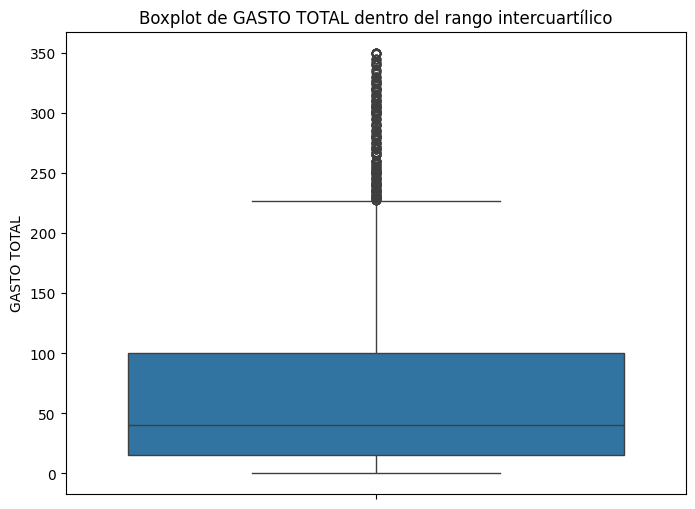


Estadísticas adicionales de GASTO TOTAL dentro del rango intercuartílico:
Media: 73.28553555636643
Mediana: 40.0
Mínimo: 0.20000000298023224
Máximo: 350.0
Cuartiles:
0.25     15.000000
0.50     40.000000
0.75    100.199999
Name: GASTO TOTAL, dtype: float64

Cantidad de filas dentro del rango intercuartílico: 4556


In [23]:
# Boxplot de la columna 'GASTO TOTAL' dentro del rango intercuartílico
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered_within_iqr, y='GASTO TOTAL')
plt.title('Boxplot de GASTO TOTAL dentro del rango intercuartílico')
plt.ylabel('GASTO TOTAL')
plt.show()

# Estadísticas adicionales del DataFrame filtrado dentro del rango intercuartílico
print("\nEstadísticas adicionales de GASTO TOTAL dentro del rango intercuartílico:")
print("Media:", df_filtered_within_iqr['GASTO TOTAL'].mean())
print("Mediana:", df_filtered_within_iqr['GASTO TOTAL'].median())
print("Mínimo:", df_filtered_within_iqr['GASTO TOTAL'].min())
print("Máximo:", df_filtered_within_iqr['GASTO TOTAL'].max())
print("Cuartiles:")
print(df_filtered_within_iqr['GASTO TOTAL'].quantile([0.25, 0.5, 0.75]))

# Mostrar cantidad de filas en el DataFrame filtrado dentro del rango intercuartílico
num_rows_within_iqr = len(df_filtered_within_iqr)
print("\nCantidad de filas dentro del rango intercuartílico:", num_rows_within_iqr)


In [24]:
# Mostrar el tipo de variables de cada columna en el DataFrame filtrado dentro del rango intercuartílico
print("\nTipo de variables de cada columna en el DataFrame filtrado dentro del rango intercuartílico:")
print(df_filtered_within_iqr.dtypes)



Tipo de variables de cada columna en el DataFrame filtrado dentro del rango intercuartílico:
P208A          float64
P301A           object
P207            object
P401            object
GASTO TOTAL    float64
dtype: object


In [25]:
# Identificar las variables categóricas
variables_categoricas = ['P301A', 'P207', 'P401']

In [26]:
# Copiar el DataFrame filtrado dentro del rango intercuartílico
df_transformado = df_filtered_within_iqr.copy()
# Transformar variables categóricas dicotómicas
# Supongamos que 'P207' y 'P401' son variables categóricas dicotómicas
dicotomicas = {'P207': {'Hombre': 1, 'Mujer': 0}, 'P401': {'Si': 1, 'No': 0}}
df_transformado.replace(dicotomicas, inplace=True)
# Transformar variables categóricas con más de dos categorías utilizando one-hot encoding
# Supongamos que 'P301A' es una variable categórica con más de dos categorías
df_transformado = pd.get_dummies(df_transformado, columns=['P301A'])

In [28]:
# Mostrar las primeras filas del DataFrame después de aplicar las transformaciones
print("\nMuestras del DataFrame después de las transformaciones:")
print(df_transformado.head())


Muestras del DataFrame después de las transformaciones:
   P208A  P207  P401  GASTO TOTAL  P301A_99  P301A_Básica especial  \
0   50.0     1     1         10.0     False                  False   
1   44.0     0     0        204.0     False                  False   
2   24.0     0     1        140.0     False                  False   
3   21.0     0     1         75.0     False                  False   
4   44.0     1     0         42.0     False                  False   

   P301A_Inicial  P301A_Maestria/Doctorado  P301A_Primaria Completa  \
0          False                     False                    False   
1          False                     False                    False   
2          False                     False                    False   
3          False                     False                    False   
4          False                     False                    False   

   P301A_Primaria Incompleta  P301A_Secundaria Completa  \
0                      False        

In [29]:
# Calcular la matriz de correlación
matriz_correlacion = df_transformado.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(matriz_correlacion)

Matriz de correlación:
                                               P208A      P207      P401  \
P208A                                       1.000000 -0.055512  0.375049   
P207                                       -0.055512  1.000000 -0.104801   
P401                                        0.375049 -0.104801  1.000000   
GASTO TOTAL                                 0.122565 -0.028432  0.177847   
P301A_99                                    0.018497  0.001059  0.000607   
P301A_Básica especial                      -0.034286  0.026997  0.035907   
P301A_Inicial                              -0.229281  0.013702 -0.074808   
P301A_Maestria/Doctorado                    0.053971  0.006758  0.030624   
P301A_Primaria Completa                     0.216731 -0.036258  0.087185   
P301A_Primaria Incompleta                  -0.027450 -0.004451  0.019942   
P301A_Secundaria Completa                   0.074411  0.043101  0.007227   
P301A_Secundaria Incompleta                -0.083488  0.011851 -0

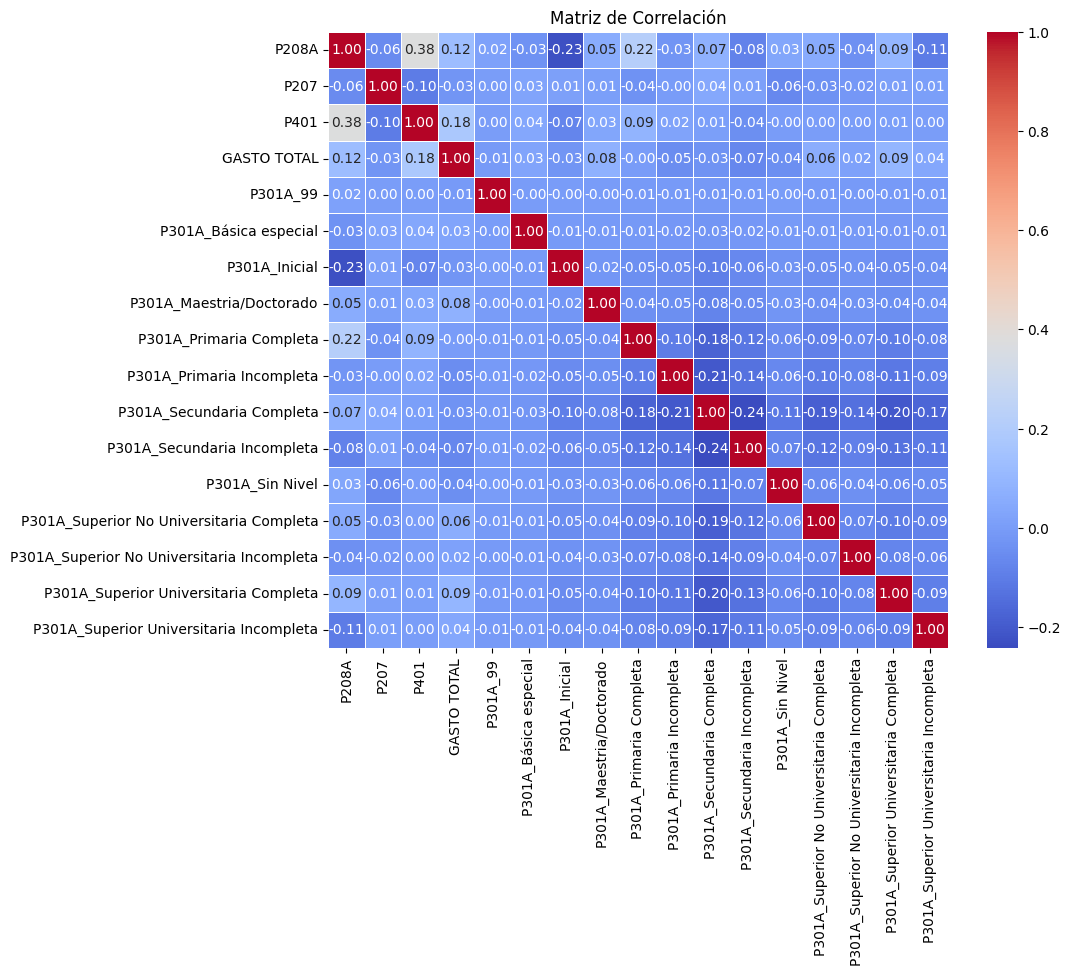

In [30]:

# Crear el gráfico de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()


In [37]:
# Mostrar el tipo de datos de cada columna en el DataFrame transformado
print("Tipo de datos de cada columna en el DataFrame transformado:")
print(df_transformado.dtypes)

Tipo de datos de cada columna en el DataFrame transformado:
P208A                                         float64
P207                                            int64
P401                                            int64
GASTO TOTAL                                   float64
P301A_99                                         bool
P301A_Básica especial                            bool
P301A_Inicial                                    bool
P301A_Maestria/Doctorado                         bool
P301A_Primaria Completa                          bool
P301A_Primaria Incompleta                        bool
P301A_Secundaria Completa                        bool
P301A_Secundaria Incompleta                      bool
P301A_Sin Nivel                                  bool
P301A_Superior No Universitaria Completa         bool
P301A_Superior No Universitaria Incompleta       bool
P301A_Superior Universitaria Completa            bool
P301A_Superior Universitaria Incompleta          bool
dtype: object


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Definir las variables independientes (X) y la variable dependiente (y)
X = df_transformado[['P208A', 'P207', 'P401', 'P301A_Básica especial', 'P301A_Inicial', 'P301A_Maestria/Doctorado',
                     'P301A_Primaria Completa', 'P301A_Primaria Incompleta', 'P301A_Secundaria Completa',
                     'P301A_Secundaria Incompleta', 'P301A_Sin Nivel', 'P301A_Superior No Universitaria Completa',
                     'P301A_Superior No Universitaria Incompleta', 'P301A_Superior Universitaria Completa',
                     'P301A_Superior Universitaria Incompleta']]
y = df_transformado['GASTO TOTAL']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar el modelo de regresión lineal
modelo_regresion_lineal = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_regresion_lineal.fit(X_train, y_train)

# Realizar predicciones utilizando los datos de prueba
predicciones = modelo_regresion_lineal.predict(X_test)

# Evaluar el desempeño del modelo
mse = mean_squared_error(y_test, predicciones)
r2 = r2_score(y_test, predicciones)
mae = mean_absolute_error(y_test, predicciones)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)
print("Error Absoluto Medio (MAE):", mae)


Error Cuadrático Medio (MSE): 6449.703530063146
Coeficiente de Determinación (R^2): 0.010242259643664986
Error Absoluto Medio (MAE): 61.024219893328066


In [47]:
from sklearn.tree import DecisionTreeRegressor

# Instanciar el modelo de regresión de árboles de decisión
modelo_arboles_decision = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
modelo_arboles_decision.fit(X_train, y_train)

# Realizar predicciones utilizando los datos de prueba
predicciones_arboles_decision = modelo_arboles_decision.predict(X_test)

# Evaluar el desempeño del modelo
mse_arboles_decision = mean_squared_error(y_test, predicciones_arboles_decision)
r2_arboles_decision = r2_score(y_test, predicciones_arboles_decision)
mae_arboles_decision = mean_absolute_error(y_test, predicciones_arboles_decision)

print("Error Cuadrático Medio (MSE) - Árboles de Decisión:", mse_arboles_decision)
print("Coeficiente de Determinación (R^2) - Árboles de Decisión:", r2_arboles_decision)
print("Error Absoluto Medio (MAE) - Árboles de Decisión:", mae_arboles_decision)


Error Cuadrático Medio (MSE) - Árboles de Decisión: 9955.300072585027
Coeficiente de Determinación (R^2) - Árboles de Decisión: -0.5277191049918761
Error Absoluto Medio (MAE) - Árboles de Decisión: 71.97240911020538


In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Definir el grado del polinomio
grado_polinomio = 2  # Puedes ajustar este valor según lo consideres necesario

# Instanciar el modelo de regresión polinómica
modelo_regresion_polinomial = make_pipeline(PolynomialFeatures(grado_polinomio), LinearRegression())

# Entrenar el modelo con los datos de entrenamiento
modelo_regresion_polinomial.fit(X_train, y_train)

# Realizar predicciones utilizando los datos de prueba
predicciones_regresion_polinomial = modelo_regresion_polinomial.predict(X_test)

# Evaluar el desempeño del modelo
mse_regresion_polinomial = mean_squared_error(y_test, predicciones_regresion_polinomial)
r2_regresion_polinomial = r2_score(y_test, predicciones_regresion_polinomial)
mae_regresion_polinomial = mean_absolute_error(y_test, predicciones_regresion_polinomial)

print("Error Cuadrático Medio (MSE) - Regresión Polinomial:", mse_regresion_polinomial)
print("Coeficiente de Determinación (R^2) - Regresión Polinomial:", r2_regresion_polinomial)
print("Error Absoluto Medio (MAE) - Regresión Polinomial:", mae_regresion_polinomial)


Error Cuadrático Medio (MSE) - Regresión Polinomial: 6550.845308269637
Coeficiente de Determinación (R^2) - Regresión Polinomial: -0.005278741808055543
Error Absoluto Medio (MAE) - Regresión Polinomial: 61.41920729999823


In [49]:
from sklearn.ensemble import RandomForestRegressor

# Instanciar el modelo de regresión de bosques aleatorios
modelo_bosques_aleatorios = RandomForestRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
modelo_bosques_aleatorios.fit(X_train, y_train)

# Realizar predicciones utilizando los datos de prueba
predicciones_bosques_aleatorios = modelo_bosques_aleatorios.predict(X_test)

# Evaluar el desempeño del modelo
mse_bosques_aleatorios = mean_squared_error(y_test, predicciones_bosques_aleatorios)
r2_bosques_aleatorios = r2_score(y_test, predicciones_bosques_aleatorios)
mae_bosques_aleatorios = mean_absolute_error(y_test, predicciones_bosques_aleatorios)

print("Error Cuadrático Medio (MSE) - Bosques Aleatorios:", mse_bosques_aleatorios)
print("Coeficiente de Determinación (R^2) - Bosques Aleatorios:", r2_bosques_aleatorios)
print("Error Absoluto Medio (MAE) - Bosques Aleatorios:", mae_bosques_aleatorios)


Error Cuadrático Medio (MSE) - Bosques Aleatorios: 8155.980943466289
Coeficiente de Determinación (R^2) - Bosques Aleatorios: -0.2515994311005936
Error Absoluto Medio (MAE) - Bosques Aleatorios: 66.85790670100671


In [51]:
from sklearn.neural_network import MLPRegressor

# Instanciar el modelo de red neuronal
modelo_red_neuronal = MLPRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
modelo_red_neuronal.fit(X_train, y_train)

# Realizar predicciones utilizando los datos de prueba
predicciones_red_neuronal = modelo_red_neuronal.predict(X_test)

# Evaluar el desempeño del modelo
mse_red_neuronal = mean_squared_error(y_test, predicciones_red_neuronal)
r2_red_neuronal = r2_score(y_test, predicciones_red_neuronal)

print("Error Cuadrático Medio (MSE) - Red Neuronal:", mse_red_neuronal)
print("Coeficiente de Determinación (R^2) - Red Neuronal:", r2_red_neuronal)


Error Cuadrático Medio (MSE) - Red Neuronal: 6449.223458523127
Coeficiente de Determinación (R^2) - Red Neuronal: 0.010315930397746031


In [52]:
# Calcular la matriz de correlación
correlation_matrix = df_transformado[['P208A', 'P207', 'P401', 'P301A_Básica especial', 'P301A_Inicial', 'P301A_Maestria/Doctorado',
                     'P301A_Primaria Completa', 'P301A_Primaria Incompleta', 'P301A_Secundaria Completa',
                     'P301A_Secundaria Incompleta', 'P301A_Sin Nivel', 'P301A_Superior No Universitaria Completa',
                     'P301A_Superior No Universitaria Incompleta', 'P301A_Superior Universitaria Completa',
                     'P301A_Superior Universitaria Incompleta', 'GASTO TOTAL']].corr()

# Calcular los valores p asociados a cada correlación
p_values = df_transformado[['P208A', 'P207', 'P401', 'P301A_Básica especial', 'P301A_Inicial', 'P301A_Maestria/Doctorado',
                     'P301A_Primaria Completa', 'P301A_Primaria Incompleta', 'P301A_Secundaria Completa',
                     'P301A_Secundaria Incompleta', 'P301A_Sin Nivel', 'P301A_Superior No Universitaria Completa',
                     'P301A_Superior No Universitaria Incompleta', 'P301A_Superior Universitaria Completa',
                     'P301A_Superior Universitaria Incompleta', 'GASTO TOTAL']].corr().iloc[-1, :-1]

# Seleccionar las tres variables con los valores p más bajos
top_3_features = p_values.abs().nlargest(3).index
top_3_p_values = p_values[top_3_features]

print("Top 3 variables más relacionadas con GASTO TOTAL:")
print(top_3_p_values)


Top 3 variables más relacionadas con GASTO TOTAL:
P401                                     0.177847
P208A                                    0.122565
P301A_Superior Universitaria Completa    0.092555
Name: GASTO TOTAL, dtype: float64


In [53]:
# Seleccionar solo las tres variables independientes más relevantes
X_reduced = df_transformado[top_3_features]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Instanciar el modelo de regresión lineal
modelo_regresion_reducido = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo_regresion_reducido.fit(X_train_reduced, y_train_reduced)

# Realizar predicciones utilizando los datos de prueba
predicciones_reducido = modelo_regresion_reducido.predict(X_test_reduced)

# Evaluar el desempeño del modelo
mse_reducido = mean_squared_error(y_test_reduced, predicciones_reducido)
r2_reducido = r2_score(y_test_reduced, predicciones_reducido)

print("Error Cuadrático Medio (MSE) - Regresión con variables reducidas:", mse_reducido)
print("Coeficiente de Determinación (R^2) - Regresión con variables reducidas:", r2_reducido)


Error Cuadrático Medio (MSE) - Regresión con variables reducidas: 6357.74141345758
Coeficiente de Determinación (R^2) - Regresión con variables reducidas: 0.02435456981507833
